In [1]:
import numpy as np
import bima
from matplotlib import pyplot as plt
from bima import Config

In [2]:
arr = np.array([[1, -1, 0, 0, 0, -1, 0], [2, 0.5, 0, 0, 0, 0.5, 0]])
initial = bima.Initial.from_arr(arr)
print(initial)

[Initial(m=1.000000000, r=(-1.000000000, 0.000000000, 0.000000000), v=(0.000000000, -1.000000000, 0.000000000)), Initial(m=2.000000000, r=(0.500000000, 0.000000000, 0.000000000), v=(0.000000000, 0.500000000, 0.000000000))]


In [13]:
config = Config(
    force=bima.ForceMethod.Direct,
    solve=bima.SolveMethod.RK4,
    timestep=bima.TimestepMethod.Constant(0.001),
    close_encounter=bima.CloseEncounterMethod.Regularized
)

sim = bima.Simulation(initial)

file = sim.in_disk(".", replace=True).run(config, 10)
file

[##################################################] 100.00% (10001) [714357 it/s]


Disk(path=/home/alisyaifudin/dev/rust/bima/python/example/res.h5)

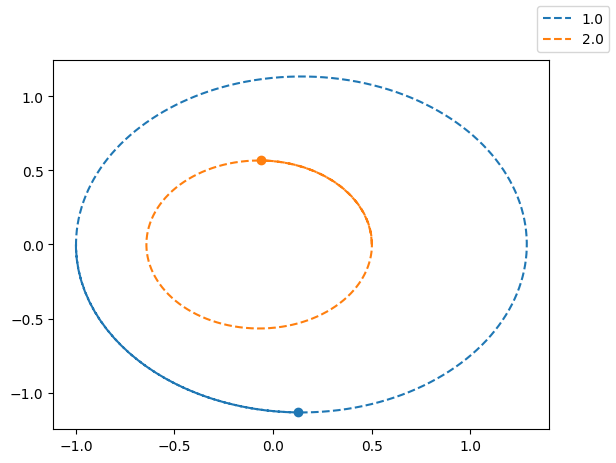

In [14]:
with file.open() as f:
  body0 = f.get(0)
  length = len(body0)
  sample_n = 1000
  skip = length//sample_n
  m0 = body0.m
  x0 = body0.x()[::skip]
  y0 = body0.y()[::skip]

  body1 = f.get(1)
  length = len(body1)
  sample_n = 1000
  m1 = body1.m
  x1 = body1.x()[::skip]
  y1 = body1.y()[::skip]

fig, ax = plt.subplots()
ax.plot(x0, y0, ls="--", label=m0)
ax.scatter(x0[-1], y0[-1])
ax.plot(x1, y1, ls="--", label=m1)
ax.scatter(x1[-1], y1[-1])
fig.legend()
plt.show()